<a href="https://colab.research.google.com/github/matusoff/Scrapping_twitter/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


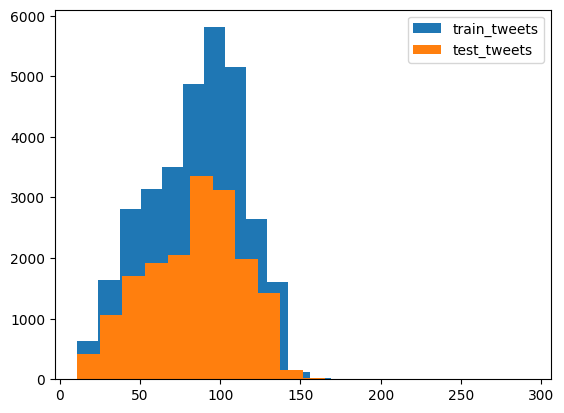

In [1]:
from ast import increment_lineno
import re  #for regular expressions
import nltk #text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
#warnings.filewarnings("ignore", category=DeprecationWarning)

%matplotlib inline

train = pd.read_csv('/content/sample_data/train_E6oV3lV.csv')
test = pd.read_csv('/content/sample_data/test_tweets_anuFYb8.csv')

#check the tweets that don't have racism / sexism expression (0)
train[train['label'] == 0].head(10)

#check the tweets that have racism / sexism expression (1)
train[train['label'] == 1].head(10)

#Dimensions of the train and test datasets
train.shape, test.shape

#Check how many tweets are labeled as rasist / sexist
train["label"].value_counts()


#Check the distribution of length of the tweets interms of words, in train and test datasets
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()


In [2]:
#Let's combine train and test datasets to preprocess the data
#later will split them again

combi = train.append(test,ignore_index=True)
combi.shape

#Preprocess the data: remove unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt


#Removing '@user' with "@[\w]*" expression and creating new column 'tidy_tweet
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

#Removing punctuations, Numbers, Special  Characters
#Using this regular expression "[^a-zA-Z#]" that means delete everything except alphabets and '#'
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

#Removing short words. We try to remove words that mean nothing for our model, like 'oh', 'hmm', 'he' etc.
#The length of these words are 3 letters or less.

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)


                              



<ipython-input-2-d28b2c4bf471>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test,ignore_index=True)
<ipython-input-2-d28b2c4bf471>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [3]:
from pandas.core.computation.parsing import tokenize
#Tweets text normalization
#Before we need to tokinize the tweets, i.e. to split a string of text into tokens or separate words

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


# Normalization the tokinezed tweets with ntlk' PorterStemmer() function
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #stemming

#stitch the token back together with ntlk's MosesDetokenizer function ()

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet


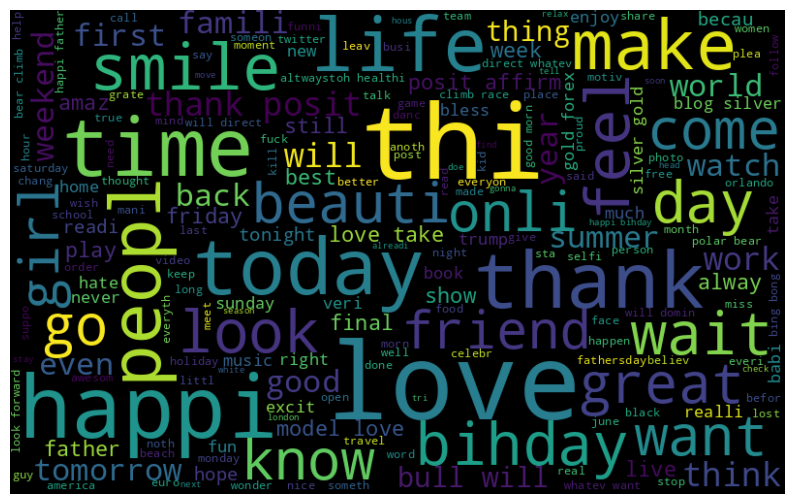

In [4]:
#Understanding the common words used in the tweets by using WorldCloud

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

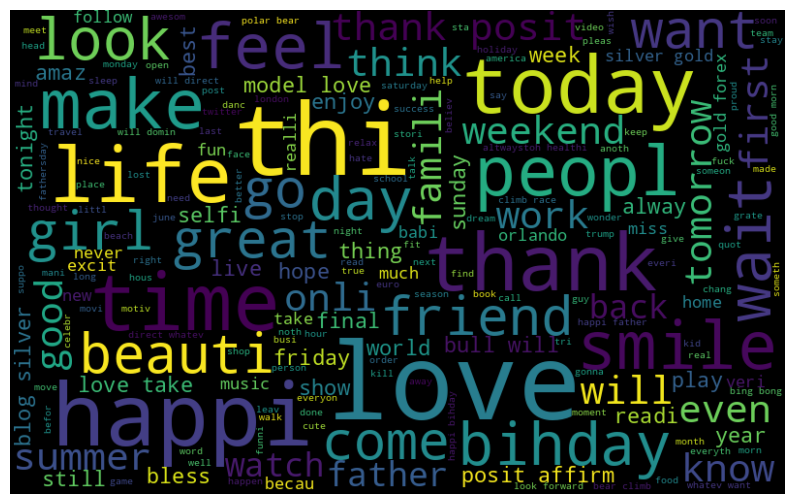

In [5]:
# Distinguish the racist and non-racist tweets

normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

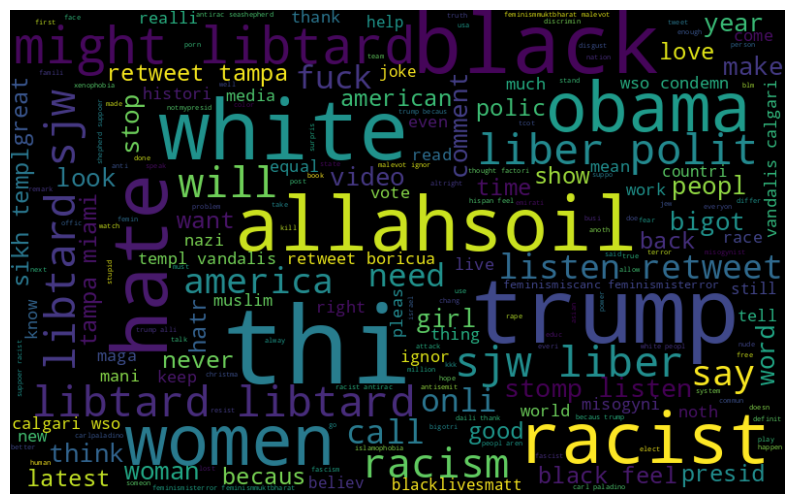

In [6]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

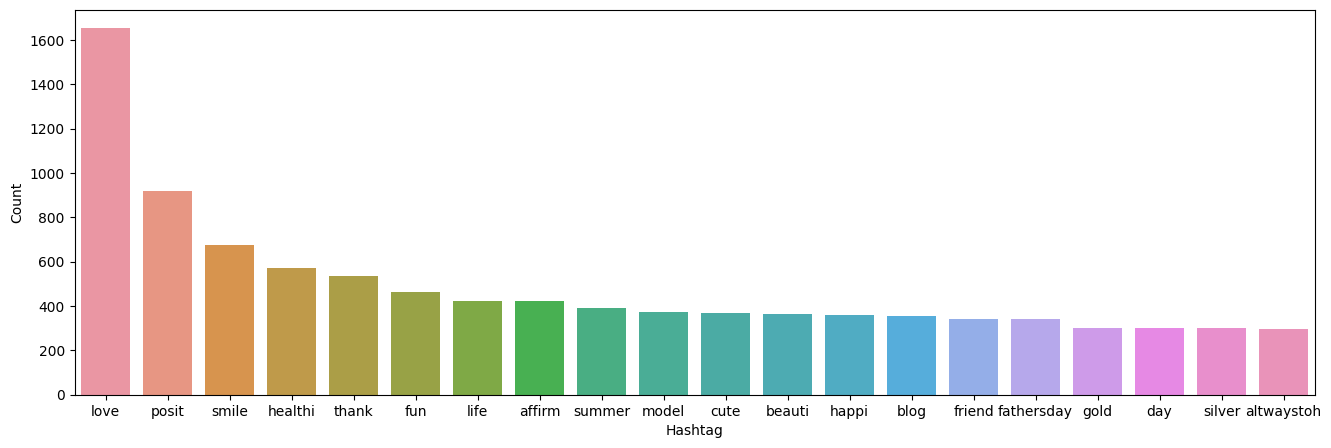

In [7]:
#Hashtags
#function to collect hashtags
def hashtag_extract(x):
  hashtags = []

  #Loop over the words in the tweet
  for i in x:
    ht=re.findall(r"#(\w+)", i)
    hashtags.append(ht)
  return hashtags

#extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

#extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

#unnesting list 
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

#plot tweets with positive vibe
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

#Select top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x ="Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

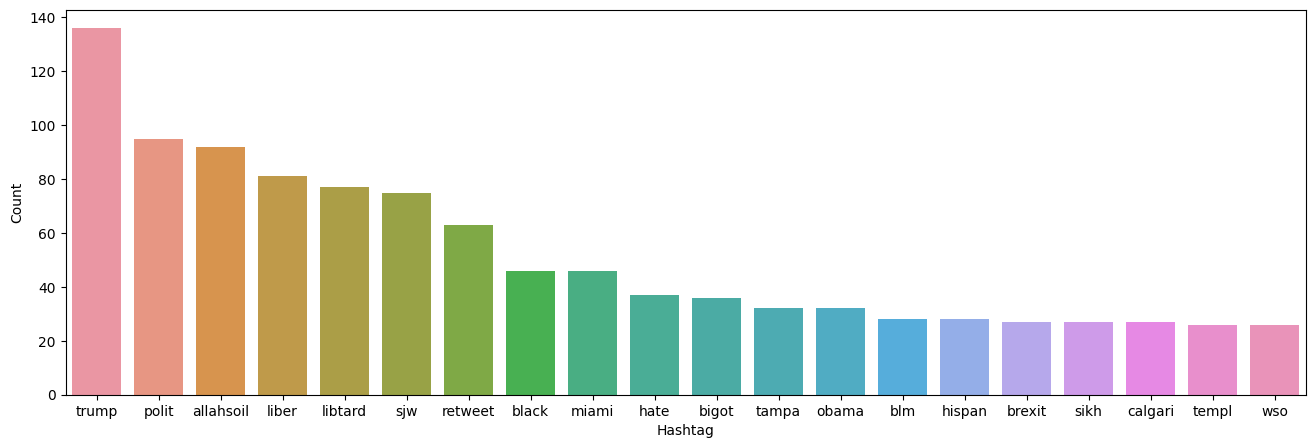

In [8]:
#plot tweets with negative vibe
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#Select top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x ="Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [9]:
#Converting preprocess data into features

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

#Bag-of-Word feature
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

#TF-IDF feature
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [10]:
#Train Word2Vec model
#tokenizing

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
    tokenized_tweet, 
    vector_size = 200, #desired number of features / independent variables
    window = 5, #context window size
    min_count = 2, 
    sg = 1, # 1 for skip-gram model
    hs = 0, 
    negative = 10, #for negative sampling 
    workers = 2, # number of cores
    seed = 34
    )
model_w2v = gensim.models.Word2Vec(tokenized_tweet,vector_size=200, window = 5, min_count = 2, sg = 1, hs = 0, negative = 10, workers = 2, seed = 34)
model_w2v.train(tokenized_tweet, total_examples = len(combi['tidy_tweet']),epochs = 20)

#Let's check the model - specify the word to see most similar words pull out by the model 
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.5492112636566162),
 ('#avocado', 0.529298722743988),
 ('#cellar', 0.5287252068519592),
 ('cookout', 0.526842474937439),
 ('#bihdaydinn', 0.5204384922981262),
 ('melani', 0.5191348791122437),
 ('#biall', 0.5153423547744751),
 ('#toast', 0.5085550546646118),
 ('#foodcoma', 0.5080242156982422),
 ('reggio', 0.5072459578514099)]

In [11]:
model_w2v.wv.most_similar(positive="love")

[('cassidi', 0.48910796642303467),
 ('maddi', 0.4724167585372925),
 ('cristina', 0.4709708094596863),
 ('viola', 0.46595633029937744),
 ('#heroesdayug', 0.46136757731437683),
 ('corrieeeeee', 0.4604422450065613),
 ('brad', 0.45944729447364807),
 ('thanku', 0.4587028920650482),
 ('feck', 0.4583703875541687),
 ('#newhair', 0.45759254693984985)]

In [12]:
vector = model_w2v.wv['food']
print(vector)
print(len(vector))

[ 1.15013540e-01 -1.88841403e-01  1.09278195e-01 -5.26962042e-01
 -2.40348220e-01  1.07751034e-01 -3.96673866e-02 -1.23622251e+00
 -2.28508681e-01 -1.47391272e+00  4.03186008e-02 -8.48552808e-02
 -7.96595141e-02  9.49421376e-02 -3.93381536e-01  4.32341881e-02
  2.08891273e-01  9.90889445e-02 -3.81619513e-01 -2.55547911e-01
 -3.88700694e-01  9.08068776e-01 -1.02994926e-01  9.41847682e-01
 -3.29287380e-01 -2.65993446e-01 -3.20372880e-01  1.15867198e-01
  1.95632800e-01  2.35925332e-01  2.85080492e-01 -5.72670162e-01
  6.15008891e-01  3.03451717e-02  5.47963120e-02 -5.23696765e-02
  1.20366871e-01  2.15194635e-02  7.09230423e-01 -3.82592767e-01
 -5.50842226e-01  7.80309379e-01 -4.40632105e-01  9.68024909e-01
 -1.55085936e-01 -3.51015292e-02 -1.22771531e-01  4.90693510e-01
 -1.04298067e+00 -1.62725598e-01 -1.59568667e-01 -7.99324453e-01
  2.66067803e-01  4.34165001e-01  7.97246933e-01 -1.21617066e-02
  2.12479904e-01  2.42874846e-01  1.08454190e-01  1.38212636e-01
 -1.83062583e-01 -2.88940

In [13]:
#Create a vector for each tweet by averaging of the vectors of the words present in the tweet

def word_vector(token, vector_size):
  vec = np.zeros(vector_size).reshape((1, vector_size))
  count = 0
  for word in token:
    try:
      vec += model_w2v.wv[word].reshape((1, vector_size))
      count +=1
    #the case where the token is not in the vocabulary
    except KeyError:
      continue
    
    if count != 0:
      vec /= count
    return vec

# word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(49159, 200)

In [14]:
#Doc2Vec

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

def add_label(twt):
  output = []
  for i, s in zip(twt.index, twt):
    output.append(TaggedDocument(s, ["tweet_" + str(i)]))
  return output

#label all the tweets
labeled_tweets = add_label(tokenized_tweet) 

#labeled_tweets[:6]


#Train doc2vec model

model_d2v = gensim.models.Doc2Vec(dm = 1, # dm=1 for 'disributed memory' model
                                  dm_mean = 1,
                                  vector_size = 200,
                                  window = 5,
                                  negative = 7, # if > 0, then negative samplining will be used
                                  min_count = 5, # Ignores all words with total frequency lower than 2
                                  workers = 3, # number of cores
                                  alpha = 0.1, # learning rate
                                  seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)


#preparanig doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range (len(combi)):
  docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

100%|██████████| 49159/49159 [00:00<00:00, 4858679.70it/s]
<ipython-input-14-bee312ed75b3>:38: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))


(49159, 200)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Extracting train and test model with BoW features
train_bow = bow[:31962,:] 
test_bow =bow[31962:,:]

#splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()

#Train the model
lreg.fit(xtrain_bow, ytrain)

#predicting on the validation set
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3 # if prediction is grater or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

#Calculating f1score for the validation set
f1_score(yvalid, prediction_int)

0.5303408146300915

In [47]:
#Extracting train and test model with Word2Vec features
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

# xtrain_w2v = xtrain_w2v.dropna().reset_index(drop=True)
# ytrain = ytrain.dropna().reset_index(drop=True)



# # #splitting data into training and validation set
# # xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['label'], random_state=42, test_size=0.3)


# lreg = LogisticRegression()
# #Train the model
# lreg.fit(xtrain_w2v, ytrain)

# #predicting on the validation set
# prediction = lreg.predict_proba(xvalid_w2v)
# prediction_int = prediction[:, 1] >= 0.3 # if prediction is grater or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(int)

# #Calculating f1score for the validation set
# f1_score(yvalid, prediction_int)

In [16]:
#Prediction for the test datasets

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3 
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int

#Writing data into csv file

submission = test[['id', 'label']]
submission.to_csv('/content/sample_data/sub_lreg_bow.csv', index=False)

In [17]:
#Extracting train and test model with TF-IDF features
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:]

#splitting data into training and validation set
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

#Train the model
lreg.fit(xtrain_tfidf, ytrain)

#predicting on the validation set
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >= 0.3 # if prediction is grater or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

#Calculating f1score for the validation set
f1_score(yvalid, prediction_int)

0.5451327433628319

In [19]:
from nltk.tag.sequential import FeaturesetTaggerI
from sklearn import svm

#Bag-of-Words Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

# Reshape yvalid if needed
#yvalid = yvalid.reshape((-1,))
f1 = f1_score(yvalid, prediction_int)
print("F1 Score:", f1)

F1 Score: 0.509731232622799


In [20]:
#Let's make prediction for the test dataset and create another submission file

test_pres = svc.predict_proba(test_bow)
test_pred_int = test_pred[:, 1]>= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('/content/sample_data/sub_svm_bow.csv', index=False)
f1 = f1_score(yvalid, prediction_int)
print("F1 Score:", f1)

F1 Score: 0.509731232622799


In [93]:
# #Word2Vec features
# xtrain_w2v = wordvec_arrays[:31962, :]
# xvalid_w2v = wordvec_arrays[31962:, :]

# svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
# prediction = svc.predict_proba(xvalid_w2v)
# prediction_int = prediction[:, 1] >= 0.3
# prediction_int = prediction_int.astype(int)

# # Reshape yvalid if needed
# yvalid = yvalid.reshape((-1,))
# f1 = f1_score(yvalid, prediction_int)
# print("F1 Score:", f1)


In [25]:
#RandomForest
#Bag-of-Words Feature
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow,ytrain)
prediction = rf.predict(xvalid_bow)

#validation score 
f1_score(yvalid, prediction)

0.5529225908372828

In [30]:
#Random Forest TD_IDF Feature

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf,ytrain)
prediction = rf.predict(xvalid_tfidf)

#validation score 
f1_score(yvalid, prediction)

0.562152133580705

In [51]:
#XGBoost with Word2Vec model

import xgboost as xgb

dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

params = {
    'objectives':'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': .3,
    'subsample': 1,
    'colsample_bytree': 1,
}

#custom evaluation metrics to calculate F1 score
def custom_eval(preds, dtrain):
  labels = dtrain.get_label().astype(int)
  preds = (preds >= 0.3).astype(int)
  return [('f1_score', f1_score(labels, preds))]

#Tuning max_depth and min_child_weight

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]

max_f1 = 0 #initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
  print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))

  #Update our parameters
  params['max_depth'] = max_depth
  params['min_child_weight'] = min_child_weight

  #Cross-valadation
  cv_results = xgb.cv(params, 
                      dtrain,
                      custom_metric=custom_eval,
                      num_boost_round=200,
                      maximize=True,
                      seed=16,
                      nfold=5,
                      early_stopping_rounds=10
                      )
#Finding best F1 score
mean_f1 = cv_results['test-f1_score-mean'].max()

boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
  max_f1 = mean_f1
  best_params = (max_depth, min_child_weight)
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
[23:30:01] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:30:02] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:30:03] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:30:03] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:30:04] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

CV with max_depth=6, min_child_weight=6
[23:31:09] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:31:09] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:31:10] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:31:10] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

[23:31:11] WARNING: ../src/learner.cc:767: 
Parameters: { "objectives" } are not used.

CV with max_depth=6, min_child_weight=7


In [53]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

params = {
    'objectives':'binary:logistic',
    'max_depth': 9,
    'min_child_weight': 7,
    'eta': .3,
    'subsample': 1,
    'colsample_bytree': 1,
}

#custom evaluation metrics to calculate F1 score
def custom_eval(preds, dtrain):
  labels = dtrain.get_label().astype(int)
  preds = (preds >= 0.3).astype(int)
  return [('f1_score', f1_score(labels, preds))]

#Tuning max_depth and min_child_weight

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10 for i in range(5,10)]
    for colsample in[i/10 for i in range(5,10)]]

max_f1 = 0 #initializing with 0
best_params = None
for subsample, colsample in gridsearch_params:
  print("CV with subsample={}, colsample={}".format(subsample, colsample))

  #Update our parameters
  params['colsample'] = colsample
  params['min_child_weight'] = subsample

  #Cross-valadation
  cv_results = xgb.cv(params, 
                      dtrain,
                      custom_metric=custom_eval,
                      num_boost_round=200,
                      maximize=True,
                      seed=16,
                      nfold=5,
                      early_stopping_rounds=10
                      )
#Finding best F1 score
mean_f1 = cv_results['test-f1_score-mean'].max()

boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
  max_f1 = mean_f1
  best_params = (subsample, colsample)
print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
[00:33:11] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:33:13] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:33:14] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:33:15] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:33:17] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

CV with subsample=0.5, colsample=0.6
[00:35:02] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:35:03] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:35:03] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:35:04] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample", "objectives" } are not used.

[00:35:05] WARNIN